In [1]:
import os
import pandas as pd

# Change this to your actual folder path
data_folder = r"C:\Users\asus\Downloads\health api"

# ML and NLP file lists
ml_files = [
    'admissionDx.csv.gz', 'admissiondrug.csv.gz', 'allergy.csv.gz', 'apacheApsVar.csv.gz',
    'apachePatientResult.csv.gz', 'apachePredVar.csv.gz', 'carePlanCareProvider.csv.gz',
    'carePlanGeneral.csv.gz', 'carePlanGoal.csv.gz',
    'carePlanInfectiousDisease.csv.gz', 'customLab.csv.gz', 'diagnosis.csv.gz',
    'hospital.csv.gz', 'infusiondrug.csv.gz', 'intakeOutput.csv.gz', 'lab.csv.gz',
    'medication.csv.gz', 'microLab.csv.gz', 'nurseAssessment.csv.gz', 'nurseCare.csv.gz',
    'nurseCharting.csv.gz', 'pastHistory.csv.gz', 'patient.csv.gz', 'physicalExam.csv.gz',
    'respiratoryCare.csv.gz', 'respiratoryCharting.csv.gz', 'treatment.csv.gz',
     'vitalPeriodic.csv.gz'
    
]


nlp_files = ['note.csv.gz']

# Dictionaries to store data
ml_data = {}
nlp_data = {}

# Load ML files
for file in ml_files:
    path = os.path.join(data_folder, file)
    if os.path.exists(path):
        ml_data[file] = pd.read_csv(path, compression='gzip')
        print(f"✅ Loaded ML file: {file} | Shape: {ml_data[file].shape}")
    else:
        print(f" Missing ML file: {file}")

✅ Loaded ML file: admissionDx.csv.gz | Shape: (7578, 6)
✅ Loaded ML file: admissiondrug.csv.gz | Shape: (7417, 14)
✅ Loaded ML file: allergy.csv.gz | Shape: (2475, 13)
✅ Loaded ML file: apacheApsVar.csv.gz | Shape: (2205, 26)
✅ Loaded ML file: apachePatientResult.csv.gz | Shape: (3676, 23)
✅ Loaded ML file: apachePredVar.csv.gz | Shape: (2205, 51)
✅ Loaded ML file: carePlanCareProvider.csv.gz | Shape: (5627, 8)
✅ Loaded ML file: carePlanGeneral.csv.gz | Shape: (33148, 6)
✅ Loaded ML file: carePlanGoal.csv.gz | Shape: (3633, 7)
✅ Loaded ML file: carePlanInfectiousDisease.csv.gz | Shape: (112, 8)
✅ Loaded ML file: customLab.csv.gz | Shape: (30, 7)
✅ Loaded ML file: diagnosis.csv.gz | Shape: (24978, 7)
✅ Loaded ML file: hospital.csv.gz | Shape: (186, 4)
✅ Loaded ML file: infusiondrug.csv.gz | Shape: (38256, 9)
✅ Loaded ML file: intakeOutput.csv.gz | Shape: (100466, 12)
✅ Loaded ML file: lab.csv.gz | Shape: (434660, 10)


C:\Users\asus\AppData\Local\Temp\ipykernel_10668\2869086496.py:32: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  ml_data[file] = pd.read_csv(path, compression='gzip')


✅ Loaded ML file: medication.csv.gz | Shape: (75604, 15)
✅ Loaded ML file: microLab.csv.gz | Shape: (342, 7)
✅ Loaded ML file: nurseAssessment.csv.gz | Shape: (91589, 8)
✅ Loaded ML file: nurseCare.csv.gz | Shape: (42080, 8)
✅ Loaded ML file: nurseCharting.csv.gz | Shape: (1477163, 8)
✅ Loaded ML file: pastHistory.csv.gz | Shape: (12109, 8)
✅ Loaded ML file: patient.csv.gz | Shape: (2520, 29)
✅ Loaded ML file: physicalExam.csv.gz | Shape: (84058, 6)
✅ Loaded ML file: respiratoryCare.csv.gz | Shape: (5436, 34)
✅ Loaded ML file: respiratoryCharting.csv.gz | Shape: (176089, 7)
✅ Loaded ML file: treatment.csv.gz | Shape: (38290, 5)
✅ Loaded ML file: vitalPeriodic.csv.gz | Shape: (1634960, 19)


In [2]:
# Extract the vitalPeriodic dataframe
vitals = ml_data['vitalPeriodic.csv.gz']

# Peek at the data
print(vitals.head())
print(vitals.columns)
print(vitals['patientunitstayid'].nunique())  # Check number of patients


   vitalperiodicid  patientunitstayid  observationoffset  temperature  sao2  \
0         29524122             141765               1179          NaN   NaN   
1         29557845             141765                189          NaN  97.0   
2         29524442             141765               1169          NaN   NaN   
3         29513052             141765               1534          NaN   NaN   
4         29524600             141765               1164          NaN   NaN   

   heartrate  respiration  cvp  etco2  systemicsystolic  systemicdiastolic  \
0       82.0          NaN  NaN    NaN               NaN                NaN   
1       76.0         30.0  NaN    NaN               NaN                NaN   
2       84.0          NaN  NaN    NaN               NaN                NaN   
3       92.0          NaN  NaN    NaN               NaN                NaN   
4       86.0          NaN  NaN    NaN               NaN                NaN   

   systemicmean  pasystolic  padiastolic  pamean  st1  s

In [3]:
# ...existing code...
# Load NLP files
for file in nlp_files:
    path = os.path.join(data_folder, file)
    if os.path.exists(path):
        nlp_data[file] = pd.read_csv(path, compression='gzip')
        print(f"✅ Loaded NLP file: {file} | Shape: {nlp_data[file].shape}")
    else:
        print(f" Missing NLP file: {file}")
# ...existing code...

✅ Loaded NLP file: note.csv.gz | Shape: (24758, 8)


In [4]:
vitals = ml_data['vitalPeriodic.csv.gz']
notes = nlp_data['note.csv.gz']
intake_output = ml_data['intakeOutput.csv.gz']
infusion_drug = ml_data['infusiondrug.csv.gz']
lab = ml_data['lab.csv.gz']
respiratory_charting = ml_data['respiratoryCharting.csv.gz']

In [5]:
#define columns to keep
vitals_cols = [
    'patientunitstayid', 'observationoffset', 'heartrate',
    'systemicsystolic', 'systemicdiastolic', 'sao2'
]
vitals = vitals[vitals_cols]
notes_cols = ['patientunitstayid', 'notetype', 'noteenteredoffset',  'noteid','notepath',
'notepath','notevalue','notetext']
intake_output_cols = [
    'patientunitstayid', 'intakeoutputoffset', 'intakeoutputentryoffset',
    'celllabel', 'cellvaluenumeric', 'cellpath'
]

infusion_drug_cols = [ 'patientunitstayid','infusionoffset',      'drugname',            
 'drugrate', 'infusionrate', 'drugamount', 'volumeoffluid', 'patientweight']
lab_cols = [ 'patientunitstayid', 'labresultoffset', 'labname',          
 'labresult', 'labresulttext' ]     
respiratory_charting_cols = [ 'patientunitstayid', 'respchartoffset', 'respcharttypecat', 
 'respchartvaluelabel',   'respchartvalue' ]   

    


In [6]:
print(respiratory_charting.columns)

Index(['respchartid', 'patientunitstayid', 'respchartoffset',
       'respchartentryoffset', 'respcharttypecat', 'respchartvaluelabel',
       'respchartvalue'],
      dtype='object')


In [7]:
vitals = vitals[vitals_cols]
notes_cols = notes[notes_cols]
intake_output_cols = intake_output[intake_output_cols]
infusion_drug_cols = infusion_drug[infusion_drug_cols]
lab_cols = lab[lab_cols]
respiratory_charting_cols = respiratory_charting[respiratory_charting_cols]




In [8]:
vitals_summary = ( vitals .groupby('patientunitstayid') .size() .reset_index(name='vitals_count'))
notes_summary = ( notes .groupby('patientunitstayid') .size() .reset_index(name='notes_count'))
intake_output_summary = ( intake_output .groupby('patientunitstayid') .size() .reset_index(name='intake_output_count'))
infusion_drug_summary = ( infusion_drug .groupby('patientunitstayid') .size() .reset_index(name='infusion_drug_count'))
lab_summary = ( lab .groupby('patientunitstayid') .size() .reset_index(name='lab_count'))
respiratory_charting_summary = ( respiratory_charting .groupby('patientunitstayid') .size() .reset_index(name='respiratory_charting_count'))


In [9]:
# Start with a base patient dataframe (e.g., patient stays)
merged = ml_data['patient.csv.gz'][['patientunitstayid']]  # or any base table

# Merge each summary table
merged = merged.merge(vitals_summary, on='patientunitstayid', how='left')
merged = merged.merge(notes_summary, on='patientunitstayid', how='left')
merged = merged.merge(intake_output_summary, on='patientunitstayid', how='left')
merged = merged.merge(infusion_drug_summary, on='patientunitstayid', how='left')
merged = merged.merge(lab_summary, on='patientunitstayid', how='left')
merged = merged.merge(respiratory_charting_summary, on='patientunitstayid', how='left')

# Fill missing counts with 0 (patients with no records in a tab
# Fill missing counts with 0 (patients with no records in a table)
merged = merged.fillna(0)

print(merged.head())
print(merged.shape)

   patientunitstayid  vitals_count  notes_count  intake_output_count  \
0             141764          69.0          0.0                  3.0   
1             141765         449.0          2.0                 25.0   
2             143870         158.0          3.0                 15.0   
3             144815         220.0          2.0                 14.0   
4             145427         238.0          2.0                 45.0   

   infusion_drug_count  lab_count  respiratory_charting_count  
0                  0.0        0.0                         0.0  
1                  0.0       72.0                         0.0  
2                  0.0       49.0                        10.0  
3                  0.0       74.0                         0.0  
4                  0.0       94.0                         8.0  
(2520, 7)


In [10]:
for col in [ 'vitals_count', 'notes_count', 'intake_output_count',
       'infusion_drug_count', 'lab_count', 'respiratory_charting_count']:
    
    merged[col] = merged[col].fillna(0)
    
    # Drop duplicates
merged.drop_duplicates(subset=['patientunitstayid'], inplace=True)

In [11]:
# Choose time bin size (in minutes)
TIME_BIN = 60  # 60-minute intervals

# Add time_bin column to each raw table
vitals['time_bin'] = (vitals['observationoffset'] // TIME_BIN).astype(int)
lab['time_bin'] = (lab['labresultoffset'] // TIME_BIN).astype(int)
respiratory_charting['time_bin'] = (respiratory_charting['respchartoffset'] // TIME_BIN).astype(int)
intake_output['time_bin'] = (intake_output['intakeoutputoffset'] // TIME_BIN).astype(int)
infusion_drug['time_bin'] = (infusion_drug['infusionoffset'] // TIME_BIN).astype(int)

# Quick check
print(vitals[['patientunitstayid','observationoffset','time_bin']].head())

#Converts raw time offsets (observationoffset, labresultoffset, etc.) 
# to hourly bins.

   patientunitstayid  observationoffset  time_bin
0             141765               1179        19
1             141765                189         3
2             141765               1169        19
3             141765               1534        25
4             141765               1164        19


In [12]:
# Add time bins (if not already added)
vitals['time_bin'] = (vitals['observationoffset'] // 60).astype(int)

# Pivot / aggregate vitals
vitals_pivot = (
    vitals.groupby(['patientunitstayid', 'time_bin'])
    .mean()
    .reset_index()
)

# Sort for clarity
vitals_pivot = vitals_pivot.sort_values(['patientunitstayid', 'time_bin'])
print(vitals_pivot.head())


   patientunitstayid  time_bin  observationoffset   heartrate  \
0             141764         0               31.5  117.750000   
1             141764         1               91.5  107.666667   
2             141764         2              151.5   95.666667   
3             141764         3              211.5  106.000000   
4             141764         4              271.5  107.833333   

   systemicsystolic  systemicdiastolic  sao2  
0               NaN                NaN   NaN  
1               NaN                NaN   NaN  
2               NaN                NaN   NaN  
3               NaN                NaN   NaN  
4               NaN                NaN   NaN  


In [13]:
#'vitals_count', 'notes_count', 'intake_output_count',
      # 'infusion_drug_count', 'lab_count', 'respiratory_charting_count'

In [14]:
# Use noteenteredoffset instead of observationoffset
notes['time_bin'] = (notes['noteenteredoffset'] // 60).astype(int)

# Count notes per patient per time_bin
notes_pivot = (
    notes.groupby(['patientunitstayid', 'time_bin'])
    .size()
    .reset_index(name='note_count')
)

# Sort for clarity
notes_pivot = notes_pivot.sort_values(['patientunitstayid', 'time_bin'])
print(notes_pivot.head())


   patientunitstayid  time_bin  note_count
0             141765         0           2
1             143870         0           3
2             144815         0           2
3             145427         0           2
4             147307         0           4


In [15]:
# Use noteenteredoffset instead of observationoffset
intake_output['time_bin'] = (intake_output['intakeoutputoffset'] // 60).astype(int)

# Count notes per patient per time_bin
intakeoutput_pivot = (
    intake_output.groupby(['patientunitstayid', 'time_bin'])
    .size()
    .reset_index(name='note_count')
)

# Sort for clarity
intakeoutput_pivot = intakeoutput_pivot.sort_values(['patientunitstayid', 'time_bin'])
print(intakeoutput_pivot.head())


   patientunitstayid  time_bin  note_count
0             141764        -1           2
1             141764         3           1
2             141765        -4           2
3             141765         0           2
4             141765         2           2


In [16]:
# Use noteenteredoffset instead of observationoffset
infusion_drug['time_bin'] = (infusion_drug['infusionoffset'] // 60).astype(int)

# Count notes per patient per time_bin
infusion_drug_pivot = (
    infusion_drug.groupby(['patientunitstayid', 'time_bin'])
    .size()
    .reset_index(name='note_count')
)

# Sort for clarity
infusion_drug_pivot = infusion_drug_pivot.sort_values(['patientunitstayid', 'time_bin'])
print(infusion_drug_pivot.head())


   patientunitstayid  time_bin  note_count
0             243097         3           1
1             249328         5           1
2             249328         6           1
3             249328         9           3
4             249328        12           2


In [17]:
# 'lab_count', 'respiratory_charting_count'#

In [18]:
# Use noteenteredoffset instead of observationoffset
lab['time_bin'] = (lab['labresultoffset'] // 60).astype(int)

# Count notes per patient per time_bin
lab_pivot = (
    lab.groupby(['patientunitstayid', 'time_bin'])
    .size()
    .reset_index(name='lab_count')
)

# Sort for clarity
lab_pivot = lab_pivot.sort_values(['patientunitstayid', 'time_bin'])
print(lab_pivot.head())


   patientunitstayid  time_bin  lab_count
0             141765        -3         35
1             141765         1          1
2             141765        10         23
3             141765        12          1
4             141765        15          1


In [19]:
respiratory_charting['time_bin'] = (respiratory_charting['respchartoffset'] // 60).astype(int)

respiratory_charting_pivot = (
    respiratory_charting.groupby(['patientunitstayid', 'time_bin'])
    .size()
    .reset_index(name='respiratory_charting_count')
)
respiratory_charting_pivot = respiratory_charting_pivot.sort_values(['patientunitstayid', 'time_bin'])
print(respiratory_charting_pivot.head())


   patientunitstayid  time_bin  respiratory_charting_count
0             143870        -2                           3
1             143870        -1                           4
2             143870         0                           1
3             143870         1                           1
4             143870         3                           1


In [20]:
#Merge all pivoted tables on patientunitstayid + time_bin:

from functools import reduce

# List all pivoted DataFrames
pivot_tables = [vitals_pivot, lab_pivot, intakeoutput_pivot, infusion_drug_pivot, respiratory_charting_pivot, notes_pivot]

# Start merging sequentially
from functools import reduce
full_timeseries = reduce(
    lambda left, right: pd.merge(left, right, on=['patientunitstayid', 'time_bin'], how='outer'),
    pivot_tables
)

# Fill missing values with 0
full_timeseries = full_timeseries.fillna(0)

# Sort by patient and time
full_timeseries = full_timeseries.sort_values(['patientunitstayid', 'time_bin'])

print(full_timeseries.head())
print(full_timeseries.shape)


        patientunitstayid  time_bin  observationoffset   heartrate  \
164520             141764        -1                0.0    0.000000   
0                  141764         0               31.5  117.750000   
1                  141764         1               91.5  107.666667   
2                  141764         2              151.5   95.666667   
3                  141764         3              211.5  106.000000   

        systemicsystolic  systemicdiastolic  sao2  lab_count  note_count_x  \
164520               0.0                0.0   0.0        0.0           2.0   
0                    0.0                0.0   0.0        0.0           0.0   
1                    0.0                0.0   0.0        0.0           0.0   
2                    0.0                0.0   0.0        0.0           0.0   
3                    0.0                0.0   0.0        0.0           1.0   

        note_count_y  respiratory_charting_count  note_count  
164520           0.0                         0.

In [21]:
#Clean-Up Steps

# Drop duplicate note_count columns (if needed)
full_timeseries = full_timeseries.drop(columns=['note_count_x', 'note_count_y'], errors='ignore')

# Rename columns for clarity
full_timeseries = full_timeseries.rename(columns={'note_count': 'notes_count'})

# Fill missing values with 0
full_timeseries = full_timeseries.fillna(0)

# Sort rows
full_timeseries = full_timeseries.sort_values(['patientunitstayid', 'time_bin']).reset_index(drop=True)

print(full_timeseries.head())
print(full_timeseries.shape)


   patientunitstayid  time_bin  observationoffset   heartrate  \
0             141764        -1                0.0    0.000000   
1             141764         0               31.5  117.750000   
2             141764         1               91.5  107.666667   
3             141764         2              151.5   95.666667   
4             141764         3              211.5  106.000000   

   systemicsystolic  systemicdiastolic  sao2  lab_count  \
0               0.0                0.0   0.0        0.0   
1               0.0                0.0   0.0        0.0   
2               0.0                0.0   0.0        0.0   
3               0.0                0.0   0.0        0.0   
4               0.0                0.0   0.0        0.0   

   respiratory_charting_count  notes_count  
0                         0.0          0.0  
1                         0.0          0.0  
2                         0.0          0.0  
3                         0.0          0.0  
4                         0.0

In [22]:
#Final Clean-Up & Prep for RNN/LSTM

# Drop any leftover duplicates (just in case)
full_timeseries = full_timeseries.drop_duplicates()

# Ensure correct sort order
full_timeseries = full_timeseries.sort_values(['patientunitstayid', 'time_bin']).reset_index(drop=True)

# Fill any remaining NaNs with 0
full_timeseries = full_timeseries.fillna(0)

# Separate feature columns (drop IDs)
feature_cols = [c for c in full_timeseries.columns if c not in ['patientunitstayid', 'time_bin']]

print(f"Features for model: {feature_cols}")


Features for model: ['observationoffset', 'heartrate', 'systemicsystolic', 'systemicdiastolic', 'sao2', 'lab_count', 'respiratory_charting_count', 'notes_count']


In [23]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

def prepare_lstm_data(full_timeseries, patient_data, target_col='hospitaldischargestatus'):
    """
    Prepare LSTM-ready data from patient time-series DataFrame.

    Parameters:
    -----------
    full_timeseries : pd.DataFrame
        Must contain ['patientunitstayid', 'time_bin', features...]
    patient_data : pd.DataFrame
        Table with patient-level targets, keyed by 'patientunitstayid'
    target_col : str
        Column name in patient_data to use as target (e.g., 'hospitaldischargestatus')

    Returns:
    --------
    X : np.ndarray
        Shape (num_patients, max_timesteps, num_features)
    y : np.ndarray
        Shape (num_patients,)
    patient_ids : list
        List of patientunitstayid in order of X, y
    feature_cols : list
        Names of features used
    """
    # Ensure sorting
    df = full_timeseries.sort_values(['patientunitstayid', 'time_bin']).reset_index(drop=True)
    
    # Select features
    feature_cols = [c for c in df.columns if c not in ['patientunitstayid', 'time_bin']]
    
    # Scale features
    scaler = StandardScaler()
    df[feature_cols] = scaler.fit_transform(df[feature_cols])

    # Group by patient and create sequences
    sequences = []
    patient_ids = []
    for pid, group in df.groupby('patientunitstayid'):
        seq = group[feature_cols].values
        sequences.append(seq)
        patient_ids.append(pid)
    
    # Pad sequences
    X = pad_sequences(sequences, padding='post', dtype='float32')
    
    # Create target array
    target_map = patient_data.set_index('patientunitstayid')[target_col]
    y = np.array([target_map.get(pid, np.nan) for pid in patient_ids])
    
    return X, y, patient_ids, feature_cols


In [25]:
#how to use 

patient_data = ml_data['patient.csv.gz']

target_col = 'hospitaldischargestatus'  # Example target column
X, y, patient_ids, feature_cols = prepare_lstm_data(full_timeseries, patient_data, target_col)

print(f"X shape: {X.shape}")
print("y shape:", y.shape)
print("Example patient IDs:", patient_ids[:5])
print("Feature columns:", feature_cols)


X shape: (2495, 1110, 8)
y shape: (2495,)
Example patient IDs: [141764, 141765, 143870, 144815, 145427]
Feature columns: ['observationoffset', 'heartrate', 'systemicsystolic', 'systemicdiastolic', 'sao2', 'lab_count', 'respiratory_charting_count', 'notes_count']


In [26]:
#train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (1996, 1110, 8), Test shape: (499, 1110, 8)


In [27]:
#Handle Class Imbalance

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


{0: 0.36881005173688103, 1: 3.9137254901960783, 2: 30.242424242424242}


In [28]:
#Build LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from tensorflow.keras.optimizers import Adam

timesteps = X_train.shape[1]
features = X_train.shape[2]

model = Sequential([
    Masking(mask_value=0., input_shape=(timesteps, features)),  # ignore padded zeros
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # binary output
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()



c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 1110, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:

print(X_train.dtype)  # should be float32 or float64
print(y_train.dtype)  # should be int or float


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



float32
<U32


In [30]:
# Convert y_train
y_train = np.array([1 if str(x).strip().lower() == 'expired' else 0 for x in y_train])

# Convert y_test
y_test = np.array([1 if str(x).strip().lower() == 'expired' else 0 for x in y_test])

# Ensure integer type
y_train = y_train.astype('int')
y_test = y_test.astype('int')

print(np.unique(y_train))  # should print [0, 1]
print(np.unique(y_test))   # should print [0, 1]


[0 1]
[0 1]


In [31]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    class_weight=class_weight_dict  # optional
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 411ms/step - accuracy: 0.7159 - loss: 0.4050 - val_accuracy: 0.8397 - val_loss: 0.5300
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.7976 - loss: 0.3658 - val_accuracy: 0.7715 - val_loss: 0.5719
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 436ms/step - accuracy: 0.8046 - loss: 0.3551 - val_accuracy: 0.7735 - val_loss: 0.5507
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 377ms/step - accuracy: 0.8086 - loss: 0.3442 - val_accuracy: 0.7776 - val_loss: 0.6098
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 372ms/step - accuracy: 0.7971 - loss: 0.3391 - val_accuracy: 0.8257 - val_loss: 0.4586
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 367ms/step - accuracy: 0.8156 - loss: 0.3312 - val_accuracy: 0.7876 - val_loss: 0.5323
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - accuracy: 0.8176 - loss: 0.3247 - val_accuracy: 0.7936 - val_loss: 0.5489
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 358ms/step - accuracy: 0.8191 - loss: 0.3139 - val_accu

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step
ROC-AUC: 0.7870


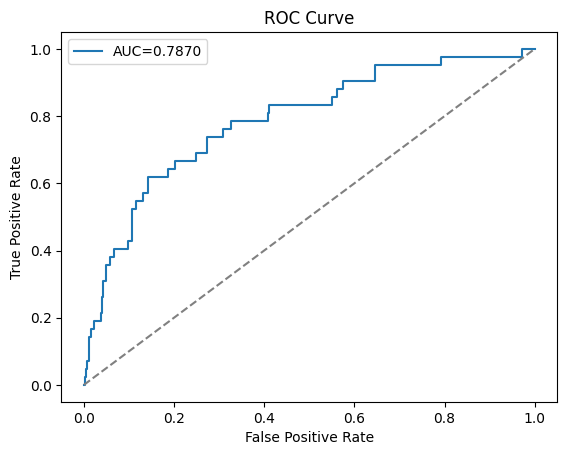

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = model.predict(X_test).ravel()

# AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC={auc:.4f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Save before showing
plt.savefig("roc_curve.png")
plt.show()
plt.close()
